In [1]:
from pathlib import Path
import re
import numpy as np
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype, is_datetime64tz_dtype
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from itertools import combinations

# =========================================================
# Config
# =========================================================
FILE_PATHS = [
    Path(r"../data/processed/aufschreibung_hra_clean.xlsx"),
    Path(r"../data/processed/aufschreibung_mta_clean.xlsx"),
]
SHEET_NAME = "Sheet1"


=== Datei: aufschreibung_hra_clean.xlsx | Sheet: Sheet1 ===


C:\Users\Felix Husmann\AppData\Local\Temp\ipykernel_28856\1273217474.py:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(ss, errors="coerce", dayfirst=True)
C:\Users\Felix Husmann\AppData\Local\Temp\ipykernel_28856\1273217474.py:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(ss, errors="coerce", dayfirst=True)
C:\Users\Felix Husmann\AppData\Local\Temp\ipykernel_28856\1273217474.py:89: Pandas4Warning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if is_datetime64tz_dtype(s):
C:\Users\Felix Husmann\AppData\Local\Temp\ipykernel_28856\1273217474.py:89: Pandas4Warning: is_datetime64tz_d

Numerische Spalten: 19 | Paarbeziehungen (n>=30): 171


,x,y,n,pearson_r,abs_r,p_value,r2,slope(y~x),intercept
0,Datum,Wochentag,4760,1.0,1.0,0.0,1.0,1.0,1.484215e-08
1,Datum,DatumNEU,4760,1.0,1.0,0.0,1.0,1.0,1.484215e-08
2,Datum,KW,4760,1.0,1.0,0.0,1.0,1.0,1.484215e-08
3,Datum,Schicht,4760,1.0,1.0,0.0,1.0,1.0,1.484215e-08
4,Wochentag,DatumNEU,4760,1.0,1.0,0.0,1.0,1.0,1.484215e-08
5,Wochentag,KW,4760,1.0,1.0,0.0,1.0,1.0,1.484215e-08
6,Wochentag,Schicht,4760,1.0,1.0,0.0,1.0,1.0,1.484215e-08
7,DatumNEU,KW,4760,1.0,1.0,0.0,1.0,1.0,1.484215e-08
8,DatumNEU,Schicht,4760,1.0,1.0,0.0,1.0,1.0,1.484215e-08
9,KW,Schicht,4760,1.0,1.0,0.0,1.0,1.0,1.484215e-08


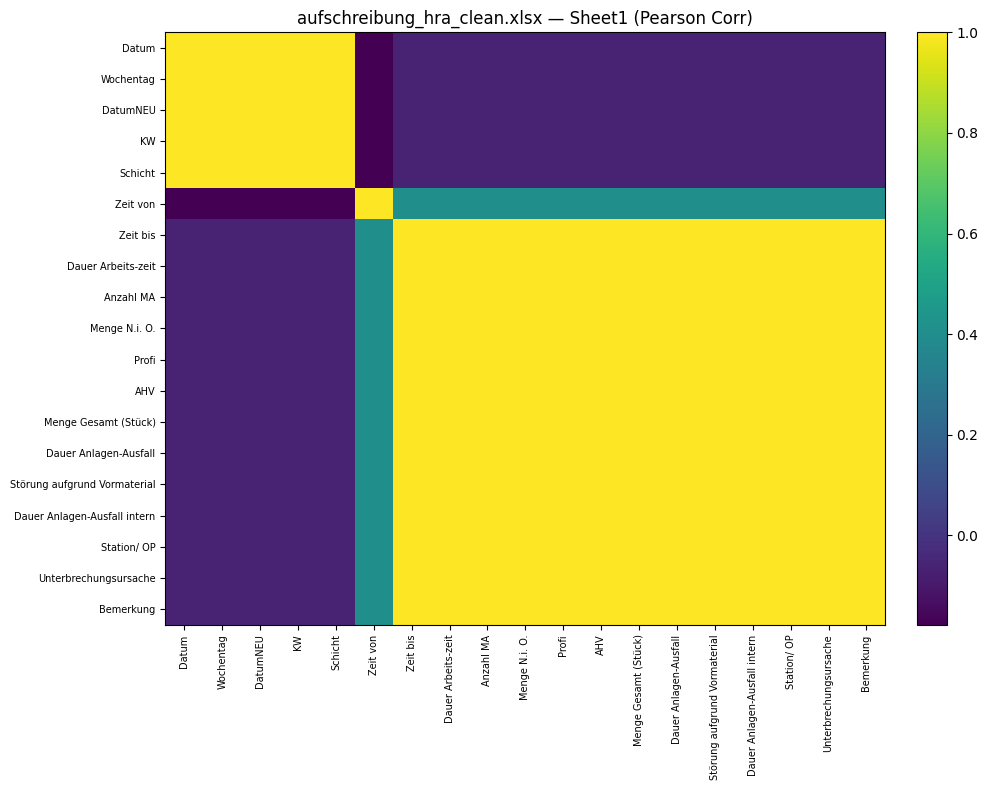

✔ Export geschrieben: C:\Users\Felix Husmann\IdeaProjects\IDS_Pred\data\processed\linear_relationships\linear_relationships__aufschreibung_hra_clean__Sheet1.xlsx

=== Datei: aufschreibung_mta_clean.xlsx | Sheet: Sheet1 ===


C:\Users\Felix Husmann\AppData\Local\Temp\ipykernel_28856\1273217474.py:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(ss, errors="coerce", dayfirst=True)
C:\Users\Felix Husmann\AppData\Local\Temp\ipykernel_28856\1273217474.py:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(ss, errors="coerce", dayfirst=True)
C:\Users\Felix Husmann\AppData\Local\Temp\ipykernel_28856\1273217474.py:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(ss, errors="coerce", dayfirst=True)
C:\Users\Felix Husmann\AppData\Local\Temp\ipyk

Numerische Spalten: 46 | Paarbeziehungen (n>=30): 1035


,x,y,n,pearson_r,abs_r,p_value,r2,slope(y~x),intercept
0,DatumNEU,Schicht,7745,1.0,1.0,0.0,1.0,1.0,-2.920080e-07
1,Zeit bis,Dauer Arbeits-zeit,7762,1.0,1.0,0.0,1.0,1.0,4.891296e-12
2,Zeit bis,Anzahl MA,7762,1.0,1.0,0.0,1.0,1.0,4.891296e-12
3,Zeit bis,Menge N.i. O.,7762,1.0,1.0,0.0,1.0,1.0,4.891296e-12
4,Zeit bis,Menge i. O. L4,7762,1.0,1.0,0.0,1.0,1.0,4.891296e-12
5,Zeit bis,Menge i. O. L5,7762,1.0,1.0,0.0,1.0,1.0,4.891296e-12
6,Zeit bis,Menge Gesamt (Stück),7762,1.0,1.0,0.0,1.0,1.0,4.891296e-12
7,Zeit bis,Dauer Anlagen-Ausfall,7762,1.0,1.0,0.0,1.0,1.0,4.891296e-12
8,Zeit bis,Station/ OP,7762,1.0,1.0,0.0,1.0,1.0,4.891296e-12
9,Zeit bis,Bemerkung,7762,1.0,1.0,0.0,1.0,1.0,4.891296e-12


(Heatmap übersprungen: zu viele Spalten)
✔ Export geschrieben: C:\Users\Felix Husmann\IdeaProjects\IDS_Pred\data\processed\linear_relationships\linear_relationships__aufschreibung_mta_clean__Sheet1.xlsx


In [2]:


OUTPUT_DIR = Path("../data/processed/linear_relationships")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

MIN_N = 30                 # Mindestanzahl gemeinsamer Werte pro Paar
TOP_K = 100                # Top-K Paare im Output
INCLUDE_CATEGORICALS = True
MAX_CAT_UNIQUE = 20        # object-Spalten one-hot, wenn <= MAX_CAT_UNIQUE unique
DROP_VERY_SPARSE_PCT = 95  # Spalten droppen, wenn >=95% missing
DROP_CONSTANT = True
MAX_HEATMAP_COLS = 40      # Heatmap nur bis zu dieser Spaltenanzahl

# Optional: p-values (nur wenn scipy verfügbar)
try:
    from scipy.stats import pearsonr
    HAVE_SCIPY = True
except Exception:
    HAVE_SCIPY = False


# =========================================================
# Helpers
# =========================================================
def normalize_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = [re.sub(r"\s+", " ", str(c).strip()) for c in df.columns]
    return df

def coerce_object_to_numeric_or_datetime(df: pd.DataFrame, numeric_threshold=0.7, dt_threshold=0.7) -> pd.DataFrame:
    """
    Versucht object/string Spalten sinnvoll zu casten:
    - numerisch (inkl. deutsches Komma) wenn ausreichend parsebar
    - datetime (dayfirst=True) wenn ausreichend parsebar
    """
    out = df.copy()

    for c in out.columns:
        s = out[c]
        if not (s.dtype == "object" or str(s.dtype) == "string"):
            continue

        ss = s.astype("string")

        # numeric cleaning: strip, remove spaces, remove thousand dots, comma->dot
        cleaned = (
            ss.str.strip()
              .str.replace(r"\s+", "", regex=True)
              .str.replace(".", "", regex=False)    # Tausenderpunkt
              .str.replace(",", ".", regex=False)   # Dezimalkomma
        )

        num = pd.to_numeric(cleaned, errors="coerce")
        num_share = float(num.notna().mean()) if len(num) else 0.0

        dt = pd.to_datetime(ss, errors="coerce", dayfirst=True)
        dt_share = float(dt.notna().mean()) if len(dt) else 0.0

        # numeric vor datetime, falls beides hoch
        if num_share >= numeric_threshold and num_share >= dt_share:
            out[c] = num
        elif dt_share >= dt_threshold:
            out[c] = dt

    return out

def numeric_frame(df: pd.DataFrame) -> pd.DataFrame:
    """Numerisches DF, optional inkl. one-hot für kleine Kategorien."""
    d = df.copy()

    # Drop sehr sparse
    miss_pct = d.isna().mean() * 100
    d = d.loc[:, miss_pct < DROP_VERY_SPARSE_PCT].copy()

    # One-hot für low-card object columns (optional)
    if INCLUDE_CATEGORICALS:
        obj_cols = [c for c in d.columns if d[c].dtype == "object" or str(d[c].dtype) == "string"]
        low_card = []
        for c in obj_cols:
            nunique = d[c].nunique(dropna=True)
            if 2 <= nunique <= MAX_CAT_UNIQUE:
                low_card.append(c)
        if low_card:
            d = pd.get_dummies(d, columns=low_card, dummy_na=False, drop_first=False)

    # Datetime -> numeric (Sekunden seit Epoch), NaT -> NaN
    for c in d.columns:
        if is_datetime64_any_dtype(d[c]):
            s = d[c]
            # tz-aware -> tz entfernen
            if is_datetime64tz_dtype(s):
                s = s.dt.tz_convert(None)

        out = pd.Series(np.nan, index=d.index, dtype="float64")
        m = s.notna()
        # datetime64[ns] -> int nanoseconds -> seconds
        out.loc[m] = s.loc[m].astype("int64") / 1e9
        d[c] = out

    d_num = d.select_dtypes(include=[np.number]).copy()

    if DROP_CONSTANT and d_num.shape[1] > 0:
        nunique = d_num.nunique(dropna=True)
        d_num = d_num.loc[:, nunique > 1].copy()

    return d_num

def pearson_r_pvalue(x: np.ndarray, y: np.ndarray):
    # returns (r, pvalue or nan)
    if HAVE_SCIPY:
        r, p = pearsonr(x, y)
        return float(r), float(p)
    # fallback: r only
    r = float(np.corrcoef(x, y)[0, 1])
    return r, np.nan

def pairwise_linear_relationships(df_num: pd.DataFrame, min_n=MIN_N) -> pd.DataFrame:
    cols = list(df_num.columns)
    pairs = []

    for a, b in combinations(cols, 2):
        x = df_num[a]
        y = df_num[b]
        m = x.notna() & y.notna()
        n = int(m.sum())
        if n < min_n:
            continue

        xv = x[m].astype(float).values
        yv = y[m].astype(float).values

        # Pearson
        try:
            r, p = pearson_r_pvalue(xv, yv)
        except Exception:
            continue

        # Linear fit y = slope*x + intercept
        try:
            slope, intercept = np.polyfit(xv, yv, 1)
        except Exception:
            slope, intercept = np.nan, np.nan

        pairs.append({
            "x": a,
            "y": b,
            "n": n,
            "pearson_r": r,
            "abs_r": abs(r),
            "p_value": p,
            "r2": r * r,
            "slope(y~x)": float(slope) if np.isfinite(slope) else np.nan,
            "intercept": float(intercept) if np.isfinite(intercept) else np.nan,
        })

    out = pd.DataFrame(pairs)
    if not out.empty:
        out = out.sort_values(["abs_r", "n"], ascending=[False, False]).reset_index(drop=True)
    return out

def plot_corr_heatmap(corr: pd.DataFrame, title: str):
    if corr.empty:
        print("Keine Korrelationsmatrix (zu wenige numerische Spalten).")
        return
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(corr.values, aspect="auto")
    ax.set_title(title)
    ax.set_xticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=90, fontsize=7)
    ax.set_yticks(range(len(corr.index)))
    ax.set_yticklabels(corr.index, fontsize=7)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()


# =========================================================
# Main (nur Sheet "Aufschreibung")
# =========================================================
for file_path in FILE_PATHS:
    if not file_path.exists():
        print(f"[WARN] Datei nicht gefunden: {file_path.resolve()}")
        continue

    print(f"\n=== Datei: {file_path.name} | Sheet: {SHEET_NAME} ===")

    # Sheet laden
    try:
        df = pd.read_excel(file_path, sheet_name=SHEET_NAME)
    except ValueError as e:
        print(f"[WARN] Sheet '{SHEET_NAME}' nicht gefunden in {file_path.name}: {e}")
        continue

    df = normalize_columns(df)
    df = coerce_object_to_numeric_or_datetime(df)

    df_num = numeric_frame(df)

    if df_num.shape[1] < 2:
        print("Zu wenige numerische Spalten nach Cleaning -> skip")
        continue

    corr = df_num.corr(method="pearson")
    rel = pairwise_linear_relationships(df_num, min_n=MIN_N)

    # Anzeigen (Top 20)
    print(f"Numerische Spalten: {df_num.shape[1]} | Paarbeziehungen (n>={MIN_N}): {len(rel)}")
    display(rel.head(20))

    # Heatmap
    if corr.shape[0] <= MAX_HEATMAP_COLS:
        plot_corr_heatmap(corr, f"{file_path.name} — {SHEET_NAME} (Pearson Corr)")
    else:
        print("(Heatmap übersprungen: zu viele Spalten)")

    # Export
    out_xlsx = OUTPUT_DIR / f"linear_relationships__{file_path.stem}__{SHEET_NAME}.xlsx"
    with pd.ExcelWriter(out_xlsx, engine="openpyxl") as writer:
        corr.to_excel(writer, sheet_name="corr_matrix")
        rel.to_excel(writer, sheet_name=f"all_pairs_top{TOP_K}"[:31], index=False)
        rel.head(TOP_K).to_excel(writer, sheet_name="top_pairs", index=False)

    print(f"✔ Export geschrieben: {out_xlsx.resolve()}")

In [4]:

OUT_DIR = Path("../data/processed/linear_relationships_plots")
OUT_DIR.mkdir(parents=True, exist_ok=True)

MIN_N = 50                   # min gemeinsame Werte pro Paar
MAX_POINTS = 5000            # downsample pro Plot
PLOT_ALL = True             # True = wirklich alle Paare plotten (kann sehr viele sein)
TOP_K = 200                  # wenn PLOT_ALL=False
MIN_ABS_R = 0.15             # optionaler Cutoff (nur Paare mit |r|>=...)

# Wenn du viele Dummy-Spalten hast: besser False lassen
INCLUDE_ONEHOT_LOW_CARD = False
MAX_CAT_UNIQUE = 20

# Optional: p-values (nur wenn scipy verfügbar)
try:
    from scipy.stats import pearsonr
    HAVE_SCIPY = True
except Exception:
    HAVE_SCIPY = False


# =========================================================
# Helpers
# =========================================================
def safe_name(s: str, maxlen: int = 40) -> str:
    """Dateiname-sicher: erlaubt A-Z a-z 0-9 _ -"""
    s = str(s)
    s = re.sub(r"[^A-Za-z0-9_-]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s[:maxlen] if maxlen else s

def normalize_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = [re.sub(r"\s+", " ", str(c).strip()) for c in df.columns]
    return df

def coerce_object_to_numeric_or_datetime(df: pd.DataFrame, numeric_threshold=0.7, dt_threshold=0.7) -> pd.DataFrame:
    out = df.copy()
    for c in out.columns:
        s = out[c]
        if not (s.dtype == "object" or str(s.dtype) == "string"):
            continue

        ss = s.astype("string")

        cleaned = (
            ss.str.strip()
              .str.replace(r"\s+", "", regex=True)
              .str.replace(".", "", regex=False)   # Tausenderpunkt
              .str.replace(",", ".", regex=False)  # Dezimalkomma
        )
        num = pd.to_numeric(cleaned, errors="coerce")
        num_share = float(num.notna().mean()) if len(num) else 0.0

        dt = pd.to_datetime(ss, errors="coerce", dayfirst=True)
        dt_share = float(dt.notna().mean()) if len(dt) else 0.0

        if num_share >= numeric_threshold and num_share >= dt_share:
            out[c] = num
        elif dt_share >= dt_threshold:
            out[c] = dt
    return out

def add_time_features(df: pd.DataFrame) -> pd.DataFrame:
    """Suche eine Startzeit-Spalte und erzeuge interpretierbare Zeitfeatures."""
    out = df.copy()
    candidates = [c for c in out.columns if re.search(r"(start|beginn|zeit)", c, re.IGNORECASE)]
    dt_col = None
    for c in candidates:
        if is_datetime64_any_dtype(out[c]):
            dt_col = c
            break
    if dt_col is None:
        return out

    s = out[dt_col]
    if is_datetime64tz_dtype(s):
        s = s.dt.tz_convert(None)

    out["_hour"] = s.dt.hour
    out["_weekday"] = s.dt.dayofweek
    out["_month"] = s.dt.month
    out["_day"] = s.dt.day
    out["_minute_of_day"] = s.dt.hour * 60 + s.dt.minute
    return out

def make_numeric_frame(df: pd.DataFrame) -> pd.DataFrame:
    d = df.copy()

    # Zeitfeatures statt epoch
    d = add_time_features(d)

    # optional: One-hot low-card categories (für Plot meist nicht sinnvoll)
    if INCLUDE_ONEHOT_LOW_CARD:
        obj_cols = [c for c in d.columns if d[c].dtype == "object" or str(d[c].dtype) == "string"]
        low_card = [c for c in obj_cols if 2 <= d[c].nunique(dropna=True) <= MAX_CAT_UNIQUE]
        if low_card:
            d = pd.get_dummies(d, columns=low_card, dummy_na=False, drop_first=False)

    # Datetime-Spalten droppen (weil wir Features erzeugt haben)
    dt_cols = [c for c in d.columns if is_datetime64_any_dtype(d[c])]
    if dt_cols:
        d = d.drop(columns=dt_cols)

    d_num = d.select_dtypes(include=[np.number]).copy()

    # constant droppen
    nunique = d_num.nunique(dropna=True)
    d_num = d_num.loc[:, nunique > 1].copy()

    return d_num

def corr_pairs(df_num: pd.DataFrame, min_n: int = MIN_N) -> pd.DataFrame:
    cols = list(df_num.columns)
    rows = []
    for a, b in combinations(cols, 2):
        x = df_num[a]
        y = df_num[b]
        m = x.notna() & y.notna()
        n = int(m.sum())
        if n < min_n:
            continue
        r = float(np.corrcoef(x[m].astype(float), y[m].astype(float))[0, 1])
        if np.isnan(r):
            continue
        rows.append({"x": a, "y": b, "n": n, "r": r, "abs_r": abs(r), "r2": r*r})
    out = pd.DataFrame(rows)
    if not out.empty:
        out = out.sort_values(["abs_r", "n"], ascending=[False, False]).reset_index(drop=True)
    return out

def plot_scatter_with_fit(x: pd.Series, y: pd.Series, xname: str, yname: str, title: str, out_png: Path):
    m = x.notna() & y.notna()
    xv = x[m].astype(float).values
    yv = y[m].astype(float).values
    n = len(xv)
    if n < 2:
        return

    # Downsample
    if n > MAX_POINTS:
        idx = np.random.choice(n, size=MAX_POINTS, replace=False)
        xv = xv[idx]
        yv = yv[idx]

    # Fit line
    try:
        slope, intercept = np.polyfit(xv, yv, 1)
        xx = np.linspace(np.nanmin(xv), np.nanmax(xv), 100)
        yy = slope * xx + intercept
    except Exception:
        xx, yy = None, None

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(xv, yv, s=8, alpha=0.25)
    if xx is not None:
        ax.plot(xx, yy, linewidth=2)

    ax.set_title(title)
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    ax.grid(True, alpha=0.2)
    plt.tight_layout()
    fig.savefig(out_png, dpi=160)
    plt.close(fig)


# =========================================================
# Main
# =========================================================
for file_path in FILE_PATHS:
    if not file_path.exists():
        print(f"[WARN] Datei nicht gefunden: {file_path.resolve()}")
        continue

    print(f"\n=== {file_path.name} | Sheet: {SHEET_NAME} ===")
    try:
        df = pd.read_excel(file_path, sheet_name=SHEET_NAME)
    except ValueError as e:
        print(f"[WARN] Sheet '{SHEET_NAME}' nicht gefunden: {e}")
        continue

    df = normalize_columns(df)
    df = coerce_object_to_numeric_or_datetime(df)

    df_num = make_numeric_frame(df)
    print("Numerische Spalten für Plot:", df_num.shape[1])

    if df_num.shape[1] < 2:
        print("Zu wenige numerische Spalten -> skip")
        continue

    pairs = corr_pairs(df_num, min_n=MIN_N)
    if pairs.empty:
        print("Keine Paare mit ausreichend n gefunden.")
        continue

    # Auswahl der Paare
    pairs_sel = pairs[pairs["abs_r"] >= MIN_ABS_R].copy()
    if not PLOT_ALL:
        pairs_sel = pairs_sel.head(TOP_K)

    print(f"Paare gesamt: {len(pairs)} | geplottet: {len(pairs_sel)}")
    display(pairs_sel.head(20))

    base = f"{file_path.stem}__{SHEET_NAME}"
    out_sub = OUT_DIR / base
    out_sub.mkdir(parents=True, exist_ok=True)

    pdf_path = OUT_DIR / f"{base}__scatter_regression.pdf"
    with PdfPages(pdf_path) as pdf:
        for i, row in pairs_sel.iterrows():
            xcol, ycol, n, r = row["x"], row["y"], int(row["n"]), float(row["r"])

            x_safe = safe_name(xcol, 40)
            y_safe = safe_name(ycol, 40)
            png_path = out_sub / f"{i:05d}__r_{r:+.3f}__{x_safe}__{y_safe}.png"

            title = f"{xcol} vs {ycol} | r={r:+.3f} | n={n}"
            plot_scatter_with_fit(df_num[xcol], df_num[ycol], xcol, ycol, title, png_path)

            # PNG in PDF einbetten
            img = plt.imread(png_path)
            fig, ax = plt.subplots(figsize=(8, 5))
            ax.imshow(img)
            ax.axis("off")
            plt.tight_layout()
            pdf.savefig(fig)
            plt.close(fig)

    print(f"✔ PNGs: {out_sub.resolve()}")
    print(f"✔ PDF:  {pdf_path.resolve()}")

    # Optional: Quick Overview Scatter-Matrix (nur wenn wenige Spalten)
    if df_num.shape[1] <= 12:
        from pandas.plotting import scatter_matrix
        sample = df_num.dropna()
        if len(sample) > 0:
            sample = sample.sample(min(2000, len(sample)), random_state=42)
            fig = plt.figure(figsize=(12, 12))
            scatter_matrix(sample, diagonal="hist", figsize=(12, 12))
            plt.suptitle(f"Scatter-Matrix (Sample) — {file_path.name}", y=1.02)
            plt.tight_layout()
            fig_path = OUT_DIR / f"{base}__scatter_matrix.png"
            plt.savefig(fig_path, dpi=160, bbox_inches="tight")
            plt.close()
            print(f"✔ Scatter-Matrix gespeichert: {fig_path.resolve()}")


=== aufschreibung_hra_clean.xlsx | Sheet: Sheet1 ===
Numerische Spalten für Plot: 15
Paare gesamt: 97 | geplottet: 17


C:\Users\Felix Husmann\AppData\Local\Temp\ipykernel_28856\2637103674.py:55: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(ss, errors="coerce", dayfirst=True)
C:\Users\Felix Husmann\AppData\Local\Temp\ipykernel_28856\2637103674.py:55: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(ss, errors="coerce", dayfirst=True)
C:\Users\Felix Husmann\AppData\Local\Temp\ipykernel_28856\2637103674.py:77: Pandas4Warning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if is_datetime64tz_dtype(s):
C:\Users\Felix Husmann\IdeaProjects\IDS_Pred\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3023: Ru

,x,y,n,r,abs_r,r2
0,_weekday,_day,4670,1.000000,1.000000,1.000000
1,_month,_day,4670,1.000000,1.000000,1.000000
2,_weekday,_month,4670,1.000000,1.000000,1.000000
3,_hour,_minute_of_day,4670,0.999800,0.999800,0.999600
4,Profi,Menge Gesamt (Stück),3445,0.779678,0.779678,0.607897
5,AHV,Menge Gesamt (Stück),1948,0.555786,0.555786,0.308898
6,Menge Gesamt (Stück),Dauer Anlagen-Ausfall,3246,-0.303902,0.303902,0.092356
7,Dauer Arbeits-zeit,Menge Gesamt (Stück),4777,0.289194,0.289194,0.083633
8,Menge Gesamt (Stück),Dauer Anlagen-Ausfall intern,658,-0.263138,0.263138,0.069242
9,Profi,Dauer Anlagen-Ausfall,2329,-0.250986,0.250986,0.062994


✔ PNGs: C:\Users\Felix Husmann\IdeaProjects\IDS_Pred\data\processed\linear_relationships_plots\aufschreibung_hra_clean__Sheet1
✔ PDF:  C:\Users\Felix Husmann\IdeaProjects\IDS_Pred\data\processed\linear_relationships_plots\aufschreibung_hra_clean__Sheet1__scatter_regression.pdf

=== aufschreibung_mta_clean.xlsx | Sheet: Sheet1 ===


C:\Users\Felix Husmann\AppData\Local\Temp\ipykernel_28856\2637103674.py:55: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(ss, errors="coerce", dayfirst=True)
C:\Users\Felix Husmann\AppData\Local\Temp\ipykernel_28856\2637103674.py:55: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(ss, errors="coerce", dayfirst=True)
C:\Users\Felix Husmann\AppData\Local\Temp\ipykernel_28856\2637103674.py:55: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(ss, errors="coerce", dayfirst=True)
C:\Users\Felix Husmann\AppData\Local\Temp\ipyk

Numerische Spalten für Plot: 24
Paare gesamt: 253 | geplottet: 96


C:\Users\Felix Husmann\IdeaProjects\IDS_Pred\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Felix Husmann\IdeaProjects\IDS_Pred\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3024: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Felix Husmann\IdeaProjects\IDS_Pred\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Felix Husmann\IdeaProjects\IDS_Pred\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3024: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Felix Husmann\IdeaProjects\IDS_Pred\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Felix Husmann\IdeaProjects\IDS_Pred\venv\Lib\site-packages\numpy\lib\_function_ba

,x,y,n,r,abs_r,r2
0,_month,_day,7762,1.000000,1.000000,1.000000
1,_weekday,_month,7762,1.000000,1.000000,1.000000
2,_weekday,_day,7762,1.000000,1.000000,1.000000
3,_hour,_minute_of_day,7762,0.999748,0.999748,0.999496
4,Anlagen-Laufzeit (- Anlagen-ausfall),Produktionszeit(min)/Std.,2582,0.998011,0.998011,0.996026
5,Dauer Arbeits-zeit,Anlagen-Laufzeit (- Org-Mangel),2587,0.994763,0.994763,0.989554
6,Takt Gesamt3,Takt Gesamt4,2585,0.990788,0.990788,0.981661
7,Takt Gesamt,Takt Gesamt2,2588,0.978725,0.978725,0.957903
8,Anlagen-Laufzeit (- Org-Mangel),Anlagen-Laufzeit (- Anlagen-ausfall),2583,0.976586,0.976586,0.953720
9,Anlagen-Laufzeit (- Org-Mangel),Produktionszeit(min)/Std.,2582,0.975069,0.975069,0.950759


✔ PNGs: C:\Users\Felix Husmann\IdeaProjects\IDS_Pred\data\processed\linear_relationships_plots\aufschreibung_mta_clean__Sheet1
✔ PDF:  C:\Users\Felix Husmann\IdeaProjects\IDS_Pred\data\processed\linear_relationships_plots\aufschreibung_mta_clean__Sheet1__scatter_regression.pdf
